In [74]:
%matplotlib inline
import glob
import os
import pandas as pd
import json
import numpy as np
import scipy.stats as ss
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.simplefilter('ignore')


In [75]:
df = pd.read_csv("graphs/power_for_03-04-17.csv")
df['in_power_in'] = df['in_power_in'].apply(pd.to_numeric)
df['in_power_out'] = df['in_power_out'].apply(pd.to_numeric)
df['out_power_in'] = df['out_power_in'].apply(pd.to_numeric)
df['out_power_out'] = df['out_power_out'].apply(pd.to_numeric)

In [76]:
df.head()

,in,in_amenity,in_power_in,in_power_out,influence,out,out_amenity,out_power_in,out_power_out
0,1376916983,cafe,2.011392,0.000000,0.011392,166903180,fast_food,0.489635,0.834958
1,1376916983,cafe,2.011392,0.000000,1.000000,3074019978,bar,0.000000,0.457937
2,1376916983,cafe,2.011392,0.000000,1.000000,1376928127,cafe,0.000000,0.532449
3,4961765347,cafe,1.015843,0.013053,1.000000,394969777,bank,0.000000,0.335179
4,4961765347,cafe,1.015843,0.013053,0.008922,167875833,fast_food,0.654719,1.136784


In [77]:
df.sort_values(['in_power_in','in_power_out'], ascending=False)[:10]

,in,in_amenity,in_power_in,in_power_out,influence,out,out_amenity,out_power_in,out_power_out
9,226615262,restaurant,2.785744,2.580562,0.224878,167875833,fast_food,0.654719,1.136784
10,226615262,restaurant,2.785744,2.580562,0.224878,167875833,fast_food,0.654719,1.136784
11,226615262,restaurant,2.785744,2.580562,1.000000,1371572669,cafe,1.000000,0.011433
12,226615262,restaurant,2.785744,2.580562,0.198804,2502987507,restaurant,1.186927,2.216866
13,226615262,restaurant,2.785744,2.580562,0.282849,168456157,cinema,0.178500,1.204036
14,226615262,restaurant,2.785744,2.580562,0.854335,166903180,fast_food,0.489635,0.834958
0,1376916983,cafe,2.011392,0.000000,0.011392,166903180,fast_food,0.489635,0.834958
1,1376916983,cafe,2.011392,0.000000,1.000000,3074019978,bar,0.000000,0.457937
2,1376916983,cafe,2.011392,0.000000,1.000000,1376928127,cafe,0.000000,0.532449
22,5391525088,pub,1.737461,1.760176,0.178121,2502987507,restaurant,1.186927,2.216866


In [78]:
df.sort_values(['out_power_in','out_power_out'], ascending=False)[:10]

,in,in_amenity,in_power_in,in_power_out,influence,out,out_amenity,out_power_in,out_power_out
6,167875833,fast_food,0.654719,1.136784,0.107394,226615262,restaurant,2.785744,2.580562
7,167875833,fast_food,0.654719,1.136784,0.053697,226615262,restaurant,2.785744,2.580562
15,2710170995,restaurant,0.480019,0.000000,0.074554,226615262,restaurant,2.785744,2.580562
27,5391525088,pub,1.737461,1.760176,0.062518,226615262,restaurant,2.785744,2.580562
41,227542955,hospital,0.041122,0.000000,0.041122,226615262,restaurant,2.785744,2.580562
5,4961765347,cafe,1.015843,0.013053,0.006921,5391525088,pub,1.737461,1.760176
16,2710170995,restaurant,0.480019,0.000000,0.204614,5391525088,pub,1.737461,1.760176
18,2502987507,restaurant,1.186927,2.216866,0.141577,5391525088,pub,1.737461,1.760176
33,166903180,fast_food,0.489635,0.834958,0.205790,5391525088,pub,1.737461,1.760176
12,226615262,restaurant,2.785744,2.580562,0.198804,2502987507,restaurant,1.186927,2.216866


<Figure size 864x576 with 0 Axes>

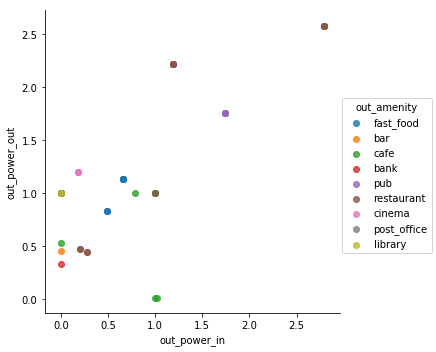

In [80]:
plt.figure(figsize=(12,8))
ax = sns.lmplot( x="out_power_in", y="out_power_out", data=df, fit_reg=False, hue='out_amenity', legend=True) 

In [81]:
df = pd.read_csv("graphs/power_for_10-04-17.csv")
df['in_power_in'] = df['in_power_in'].apply(pd.to_numeric)
df['in_power_out'] = df['in_power_out'].apply(pd.to_numeric)
df['out_power_in'] = df['out_power_in'].apply(pd.to_numeric)
df['out_power_out'] = df['out_power_out'].apply(pd.to_numeric)

In [24]:
df.sort_values(['in_power_in','in_power_out'], ascending=False)[:10]

,in,in_amenity,in_power_in,in_power_out,influence,out,out_amenity,out_power_in,out_power_out
3,226615262,restaurant,2.008535,1.732474,0.115745,227542955,hospital,0.000000,0.156122
4,226615262,restaurant,2.008535,1.732474,0.498447,1838812965,cafe,1.242795,0.572183
5,226615262,restaurant,2.008535,1.732474,0.498121,2504506706,restaurant,0.903989,1.220503
6,226615262,restaurant,2.008535,1.732474,0.504156,202731618,cafe,0.000000,1.101245
7,226615262,restaurant,2.008535,1.732474,0.392068,261990580,restaurant,1.501879,1.426280
34,5391525088,pub,1.551196,2.808168,1.000000,5382222595,restaurant,0.000000,0.447798
35,5391525088,pub,1.551196,2.808168,0.551196,2710170995,restaurant,0.623758,1.416814
0,203460361,bar,1.533011,1.000000,0.533011,204087579,bar,0.000000,0.591952
1,203460361,bar,1.533011,1.000000,1.000000,203557512,restaurant,0.000000,0.408048
8,261990580,restaurant,1.501879,1.426280,0.501879,2504506706,restaurant,0.903989,1.220503


In [82]:
df.sort_values(['out_power_in','out_power_out'], ascending=False)[:10]

,in,in_amenity,in_power_in,in_power_out,influence,out,out_amenity,out_power_in,out_power_out
14,4961765347,cafe,0.046209,1.000000,0.002914,226615262,restaurant,2.008535,1.732474
18,166903180,fast_food,0.101558,0.000000,0.101558,226615262,restaurant,2.008535,1.732474
29,2710170995,restaurant,0.623758,1.416814,0.100875,226615262,restaurant,2.008535,1.732474
30,2710170995,restaurant,0.623758,1.416814,0.212952,5391525088,pub,1.551196,2.808168
32,2502987507,restaurant,0.577403,0.263839,0.147347,5391525088,pub,1.551196,2.808168
38,5336003141,restaurant,0.146804,0.000000,0.146804,5391525088,pub,1.551196,2.808168
42,5391525086,restaurant,0.033822,1.000000,0.033822,5391525088,pub,1.551196,2.808168
45,1734602640,cafe,0.325393,1.000000,0.325393,203460361,bar,1.533011,1.000000
7,226615262,restaurant,2.008535,1.732474,0.392068,261990580,restaurant,1.501879,1.426280
10,2504506706,restaurant,0.903989,1.220503,0.365137,261990580,restaurant,1.501879,1.426280


In [83]:
#ax = df.plot.scatter(x='in_power_in', y='in_power_out',c=df.Color, figsize=(12,8))
#for i, txt in enumerate(df['in_amenity']):
#    ax.annotate(txt, (df.in_power_in[i],df.in_power_out[i]), size=8, xytext=(0,0), ha='right', textcoords='offset points')


<Figure size 864x576 with 0 Axes>

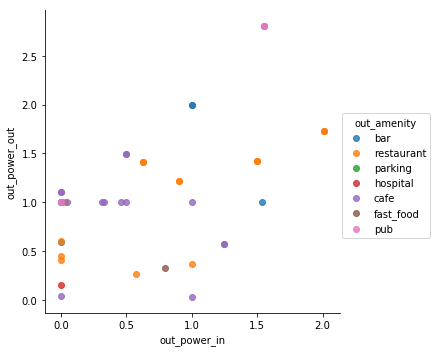

In [85]:
plt.figure(figsize=(12,8))
ax = sns.lmplot( x="out_power_in", y="out_power_out", data=df, fit_reg=False, hue='out_amenity', legend=True) 